<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/estudos_de_python_em_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @# markdown codigo é o ticker na B3. Data é ano/mes/dia.

codigo  = 'egie3'       #@param {type:"string"}
inicio  = '2020-08-31'  #@param {type:"date"}
termino = '2023-07-10'  #@param {type:"date"}


usar_periodo = True #@param {type:"boolean"}
if usar_periodo :
  periodo = 'max' #@param ['1d','5d','1mo','3mo','6mo','1y','2y','3y','5y','10y','ytd','max']
#else: #periodo em anos
#  periodo = ((datetime.strptime(termino,'%Y-%m-%d') - datetime.strptime(inicio,'%Y-%m-%d')).days)/365
codigo = codigo.upper()

In [2]:
codigo

'EGIE3'

In [3]:
#@markdown Importação do pacotes do python

import warnings
warnings.filterwarnings('ignore')

import datetime
from datetime import datetime
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm


!pip install -q googletrans==4.0.0rc1
from googletrans import Translator
translator = Translator()
from google.colab import data_table


try:
  import yfinance as yf
except:
  !pip install -q yfinance --upgrade
  import yfinance as yf
try:
  import quandl
except:
  !pip install -q quandl
  import quandl
finally:
  quandl.ApiConfig.api_key = ''
try:
  import investpy as inv
except:
  !pip install -q investpy
  import investpy as inv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 4]
plt.style.use('seaborn')

#!pip install -q plotly --upgrade
## plotly
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
from plotly.offline import iplot, init_notebook_mode

## sns
import seaborn as sns

## cufflinks
import cufflinks as cf
cf.go_offline()

from IPython.display import clear_output
clear_output()

IBrA = [
    'RRRP3', 'ALPA4', 'ABEV3', 'ALSO3' ,'AMER3', 'ASAI3', 'AZUL4', 'B3SA3', 'BPAN4', 'BBSE3', 'BBDC3',
    'BBDC4', 'BRAP4','BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3',
    'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3',
    'ENBR3', 'ENGI11','ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3',
    'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3','ITSA4','ITUB4', 'JBSS3', 'JHSF3', 'KLBN11', 'RENT3',
    'LWSA3', 'LREN3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4',
    'PRIO3', 'PETZ3', 'POSI3', 'QUAL3', 'RADL3', 'RDOR3','RAIL3', 'SBSP3', 'SANB11', 'CSNA3', 'SLCE3',
    'SUZB3','TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3','VIIA3', 'VBBR3',
    'WEGE3', 'YDUQ3', 'NGRD3', 'POSI3' , 'SQIA3' , 'VLID3'
    ]

IBr50 = ['RRRP3', 'ABEV3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBSE3', 'BBDC4',
    'BBAS3', 'BRFS3', 'BPAC11', 'CCRO3', 'CMIG4', 'CIEL3', 'CSAN3',
    'CYRE3', 'ELET3', 'ELET6', 'EMBR3', 'ENEV3', 'EQTL3', 'GGBR4',
    'NTCO3', 'HAPV3', 'HYPE3','ITSA4', 'ITUB4', 'JBSS3', 'KLBN11',
    'RENT3', 'LREN3', 'MGLU3','MRFG3', 'BEEF3', 'MULT3', 'PETR3',
    'PETR4', 'PRIO3', 'PETZ3', 'RADL3', 'RDOR3', 'RAIL3', 'SBSP3',
    'CSNA3', 'SUZB3', 'TOTS3', 'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3'
    ]


In [4]:
## RENDERIZAÇÂO DE GRAFICOS

import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [5]:
## uso o 'svg' pra enviar para o github, porem perde o modo interativo
!pip install -Uq kaleido
plotly.io.renderers.default = 'png'
#plotly.io.renderers.default = 'colab'

In [6]:
#@markdown A empresa e Indicadores fundamentalistas (de fundamentus.com.br)

try:
  desc = inv.get_stock_company_profile(stock = codigo , country = "Brazil")
except:
  print(codigo)
else:
  result = translator.translate(desc['desc'], dest='pt')
  #print(result.text)
  import textwrap
  print("\n".join(textwrap.wrap(result.text,118)))

import requests
url = 'https://www.fundamentus.com.br/resultado.php'

#pra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#junta com a requests
r = requests.get(url, headers=header)
# read_html do pandas põe a tabela num dataframe
funds = pd.read_html(r.text, decimal=',', thousands='.')
dfunds = pd.DataFrame(funds[0])

(dfunds.loc[dfunds['Papel']==codigo]).set_index('Papel')

EGIE3


,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
Papel,,,,,,,,,,,,,,,,,,,,
EGIE3,44.76,12.59,3.95,3.106,"7,41%",0.922,27.97,6.82,-1.64,9.55,8.09,"45,55%","24,68%",1.19,"14,82%","31,37%",66449100.0,9.244140e+09,1.9,"7,06%"


Download dos preços

In [7]:
#@ markdown Download dos dados do ativo(s) e do índice

ativo = pd.DataFrame()
ibov = pd.DataFrame()
if usar_periodo :
  ativo = yf.download(codigo+'.SA', period = periodo , actions=True , progress = False)
  ibov = yf.download('^BVSP', period = periodo , actions=True , progress = False)
else :
  ativo = yf.download(codigo+'.SA' , start=inicio , end=termino , actions=True ,  progress = False)
  ibov = yf.download('^BVSP', start=inicio , end=termino , actions=True, progress = False)

Dividendos no período

In [8]:
proventos = ativo['Dividends'][ativo['Dividends']!=0]

print(proventos.count() , 'proventos pagos no período, total', round(ativo['Dividends'].sum(),2))
if ativo['Stock Splits'].sum() == 0 :
  print('provento medio', round(proventos.mean(),2), end=(', '))
  print('média anual', round(proventos.sum()/((ativo.index[-1]-ativo.index[0]).days/365),2), end=(', '))
  print('preço medio no periodo', round(ativo['Adj Close'].mean(),2), end=(', '))
  print('yield (pelas medias)'+str(round(proventos.sum()/((ativo.index[-1]-ativo.index[0]).days/365)/ativo['Adj Close'].mean()*100,3))+'%')
print(ativo['Dividends'][ativo['Dividends']!=0])


48 proventos pagos no período, total 28.09
Date
2007-12-14    0.107853
2009-08-14    0.426516
2009-11-18    0.237766
2010-05-07    0.100392
2010-10-01    0.350644
2010-11-18    0.269632
2011-05-02    0.193975
2011-08-11    0.806464
2011-11-18    0.311290
2012-04-16    0.317026
2012-08-13    0.850272
2012-11-26    0.338504
2013-02-20    0.706472
2013-08-19    0.940728
2013-11-26    0.300026
2014-09-12    0.566000
2014-11-11    0.465867
2014-11-26    0.273309
2015-05-11    0.210902
2015-08-21    0.381501
2015-11-24    0.384838
2016-05-11    0.256762
2016-08-09    0.790752
2016-11-11    0.530071
2017-05-30    0.502060
2017-08-10    1.150736
2017-11-10    0.520266
2018-04-24    0.780407
2018-08-21    1.404581
2018-11-13    0.800000
2018-12-27    0.486562
2019-01-04    0.486562
2019-05-07    0.094006
2019-12-03    1.528812
2020-04-29    1.164004
2020-08-10    0.830573
2020-12-21    0.679560
2021-04-29    0.018649
2021-05-12    0.747117
2021-08-17    0.967632
2021-08-18    0.967632
2021-12-3

Date
2007-12-31    0.107853
2008-12-31    0.000000
2009-12-31    0.664282
2010-12-31    0.720668
2011-12-31    1.311729
2012-12-31    1.505802
2013-12-31    1.947226
2014-12-31    1.305176
2015-12-31    0.977241
2016-12-31    1.577585
2017-12-31    2.173062
2018-12-31    3.471550
2019-12-31    2.109380
2020-12-31    2.674137
2021-12-31    2.774565
2022-12-31    2.989438
2023-12-31    1.783441
Name: Dividends, dtype: float64

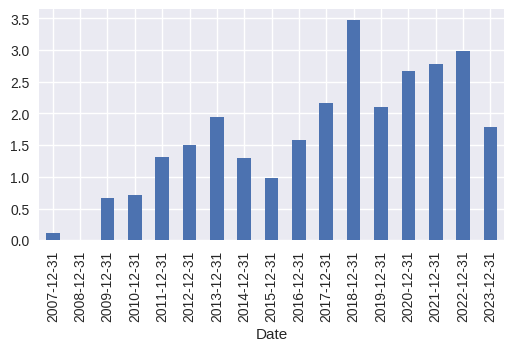

In [9]:
yanual = proventos.groupby(pd.Grouper(freq='Y')).sum()
yanual.index = pd.to_datetime(yanual.index).strftime('%Y-%m-%d')
yanual.plot(kind="bar",figsize=(6,3));
yanual

# preço


In [10]:
qual_preco = 'Adj Close' #@param ['Open','High','Close','Low','Adj Close']


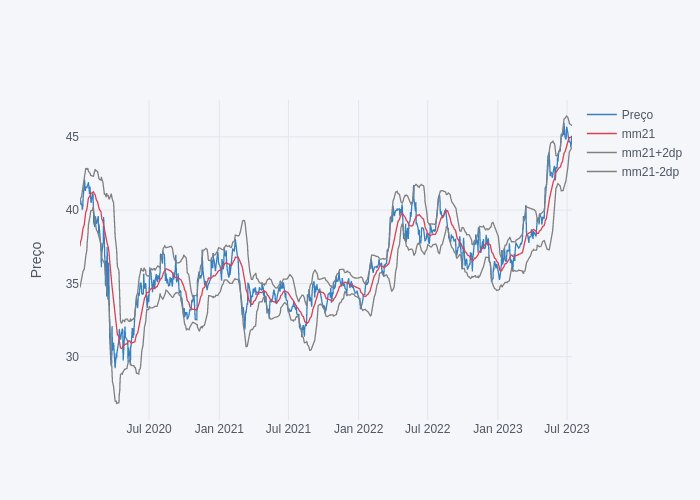

In [11]:

preco = pd.DataFrame()
preco['Preço'] = ativo[qual_preco]
preco['ibov'] = ibov[qual_preco]
preco['mm21'] = preco['Preço'].rolling(21).mean()
Mov_SD = preco['Preço'].rolling(21).std(ddof=0)
preco['mm21+2dp'] = preco['mm21'] + 2*Mov_SD
preco['mm21-2dp'] = preco['mm21'] - 2*Mov_SD
preco.loc['2020':].iplot(keys = ['Preço','mm21','mm21+2dp','mm21-2dp'], yTitle='Preço' ,
            colors=['blue','red','gray','gray'])

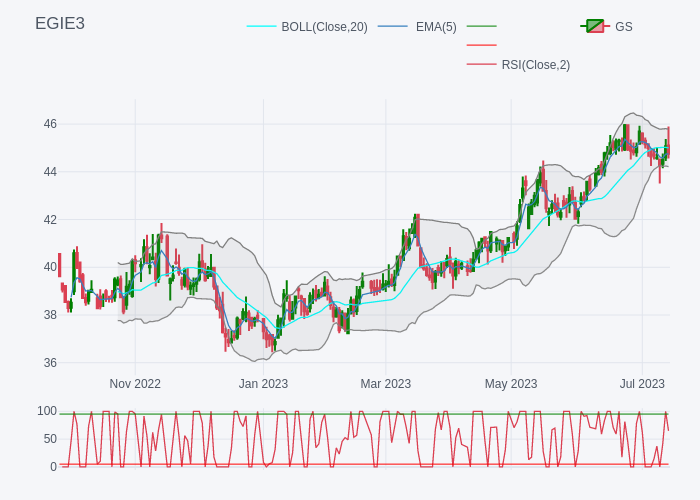

In [12]:
if len(ativo>200) :
  qf=cf.QuantFig(ativo[-200:],title=codigo,legend='top',name='GS',up_color='green', down_color='red' )
  qf.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True)
  qf.add_ema(periods=5)
  qf.add_rsi(periods=2,color='red',rsi_upper=95,rsi_lower=5,showbands=True)
  #qf.add_macd(fast_period=9,slow_period=21,signal_period=3)
  #qf.add_resistance(date='2022-11-11', on='close', color='orange')

  fig = qf.figure()
  fig.update_xaxes(
      rangebreaks=[dict(bounds=["sat", "mon"])])
  fig.show()

###simulação
via [movimento browniano geométrico](https://pt.wikipedia.org/wiki/Movimento_browniano_geom%C3%A9trico) (GBM)

In [13]:
n_dias =         5#@param {type:"integer"}
n_grafico = n_dias + 21
n_cenarios =    1000#@param {type:"integer"}

In [14]:
s_media     = (np.log(preco['Preço']/preco['Preço'].shift(1))).mean()
s_variancia = (np.log(preco['Preço']/preco['Preço'].shift(1))).var()
s_desvio_padrao = s_variancia**.5
## simula movimento browniano geométrico (MBG)
Z = stats.norm.ppf(np.random.rand(n_dias,n_cenarios))
retornos_diarios = np.exp((s_media - (0.5 * s_variancia)) + s_desvio_padrao * Z)
previsoes = np.zeros_like(a = np.arange(n_grafico*n_cenarios),dtype=float,shape=(n_grafico,n_cenarios))

for dia in range(n_grafico) :
  if dia < (n_grafico - n_dias) :
    previsoes[dia] = preco['Preço'].tail(n_grafico - n_dias).values[dia]
  else :
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia - (n_grafico-n_dias)]

cenarios = pd.DataFrame()
for i in range(len(previsoes.T)):
  cenarios['cenario'+str(i)] = previsoes.T[i]


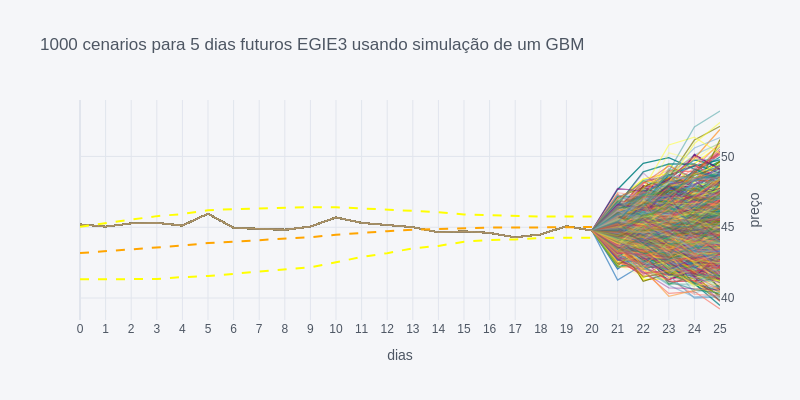

In [15]:
fig = cenarios.iplot(asFigure=True)

titulo = str(n_cenarios)+' cenarios para '+str(n_dias)+' dias futuros '+codigo+ ' usando simulação de um GBM'
layout = go.Layout(title=titulo,
                   yaxis={'title' : 'preço' , 'side' : 'right'},
                   xaxis={'title' : 'dias' , 'dtick' : 1 })


fig.update_layout(layout,showlegend=False,width=800,height=400)

fig.add_trace(go.Scatter(x=pd.Series(range(21)) ,
                         y= preco['mm21'][-(n_grafico-n_dias):].values,
                         mode='lines', name='mm21',line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=pd.Series(range(21)) ,
                         y= preco['mm21+2dp'][-(n_grafico-n_dias):].values,
                         mode='lines', name='upper BB',line=dict(color='yellow', dash='dash')))
fig.add_trace(go.Scatter(x=pd.Series(range(21)) ,
                         y= preco['mm21-2dp'][-(n_grafico-n_dias):].values,
                         mode='lines', name='lower BB',line=dict(color='yellow', dash='dash')))


fig.show()

intervalo de confiança para o preço na primeira simulação

In [16]:
alpha=0.95

In [17]:
stats.t.interval(alpha=alpha, df=n_cenarios-1,
                 loc=np.mean(previsoes[n_grafico - n_dias]), scale=stats.sem(previsoes[n_grafico - n_dias]))
#stats.norm.interval(alpha=0.99, loc=np.mean(previsoes[n_grafico - n_dias]), scale=stats.sem(previsoes[n_grafico - n_dias]))

(44.69335709592651, 44.814793601451065)

intervalo de confiança  para o preço na ultima simulação

In [18]:
stats.t.interval(alpha=alpha, df=n_cenarios-1,
                 loc=np.mean(previsoes[-1]), scale=stats.sem(previsoes[-1]))
#stats.norm.interval(alpha=0.99, loc=np.mean(previsoes[-1]), scale=stats.sem(previsoes[-1]))

(44.83218637419829, 45.108962880289695)

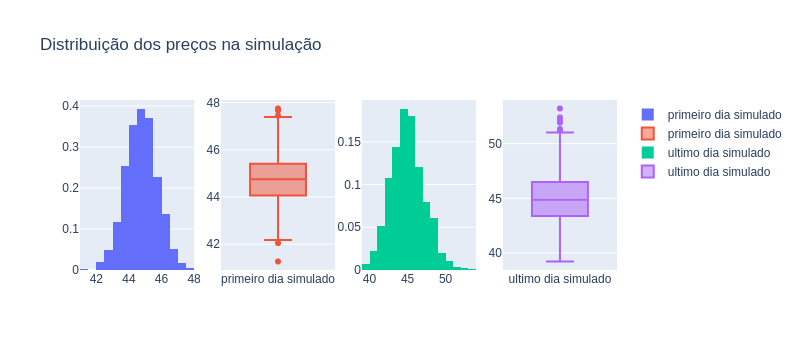

In [19]:
title='Distribuição dos preços na simulação'

from plotly.subplots import make_subplots

trace1 = go.Histogram(x=previsoes[n_grafico - n_dias] , nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='primeiro dia simulado')
trace3 = go.Histogram(x=previsoes[-1], nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='ultimo dia simulado')
trace2 = go.Box(y=previsoes[n_grafico - n_dias],name='primeiro dia simulado')
trace4 = go.Box(y=previsoes[-1],name='ultimo dia simulado')

fig = make_subplots(rows=1, cols=4)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig['layout'].update(height=350, width=800, title=title)

fig.show()

###tendência
*Expoente de Hurst* — Uma maneira rápida de investigar se uma determinada série temporal é tendência, reversão à média ou caminhada aleatória. É  uma medida para a memória de longo prazo de uma série temporal, ou seja, para medir a quantidade pela qual essa série se desvia de um passeio aleatório.



In [20]:
def get_hurst_exponent(ts, max_lag=20):
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]

    return np.polyfit(np.log(lags), np.log(tau), 1)[0]

Os valores do expoente de Hurst variam entre 0 e 1 com os quais podemos classificar qualquer série temporal em uma das três categorias:
* H < 0,5 — uma série de reversão à média. Quanto mais próximo 0, mais força tem o processo de reversão à média.
* H = 0,5 — um passeio aleatório geométrico.
* H > 0,5 — uma série de tendência. Quanto mais próximo de 1, mais forte será a tendência.

exponetes de Hurst com lag 20  ----
mean_rev: 0.0064
gbm: 0.4539
trending: 0.8715
exponetes de Hurst com lag 100  ----
mean_rev: -0.0021
gbm: 0.5401
trending: 0.8442
exponetes de Hurst com lag 300  ----
mean_rev: 0.0002
gbm: 0.5691
trending: 0.7463
exponetes de Hurst com lag 500  ----
mean_rev: 0.0015
gbm: 0.4854
trending: 0.6662


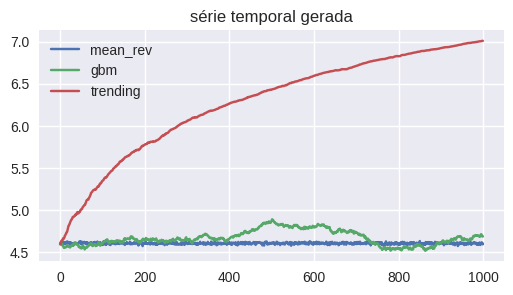

In [21]:
sample_size = 1000
scalar = 100

np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})
df.plot(title="série temporal gerada",figsize=(6,3));

for lag in [20, 100, 300, 500]:
    print(f"exponetes de Hurst com lag {lag}  ----")
    for column in df.columns:
        print(f"{column}: {get_hurst_exponent(df[column].values, lag):.4f}")

Na prática, com H < 0,5, significa que um valor alto é seguido por um valor baixo e vice-versa. Com H > 0,5, um valor alto é seguido por outro mais alto.

In [22]:
print(codigo)
for lag in [20, 100, 250, 500, 1000]:
    hurst_exp = get_hurst_exponent(preco['Preço'].values, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")

print('ibov'.upper())
for lag in [20, 100, 250, 500, 1000]:
    hurst_exp = get_hurst_exponent(preco['ibov'].values, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")
#shorter_series = preco['Preço'].loc["2022":"2023"].values
#for lag in [20, 100, 250, 500]:
#    hurst_exp = get_hurst_exponent(shorter_series, lag)
#    print(f"{lag} lags: {hurst_exp:.4f}")


EGIE3
20 lags: 0.4757
100 lags: 0.4433
250 lags: 0.3954
500 lags: 0.4093
1000 lags: 0.4037
IBOV
20 lags: nan
100 lags: nan
250 lags: nan
500 lags: nan
1000 lags: nan


https://www.investopedia.com/terms/r/rescaled-rangeanalysis.asp

https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing/

### cointegração

In [23]:
from statsmodels.tsa.stattools import coint, adfuller

In [24]:
def check_estacionaridade(X, cutoff=0.01):
    # H_0 é nao-estacionário, i.e., admite raiz unitaria (teste adfuller)

    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' A serie "'+X.name+'" é, provavelmente, estacionaria.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' A serie "'+X.name+'" é, provavelmente, não-estacionaria.')
        return False

In [25]:
check_estacionaridade(preco['Preço'])

p-value = 0.9908898012591169 A serie "Preço" é, provavelmente, não-estacionaria.


False

p-value = 9.186259793739595e-25 A serie "Delta de Preço" é, provavelmente, estacionaria.


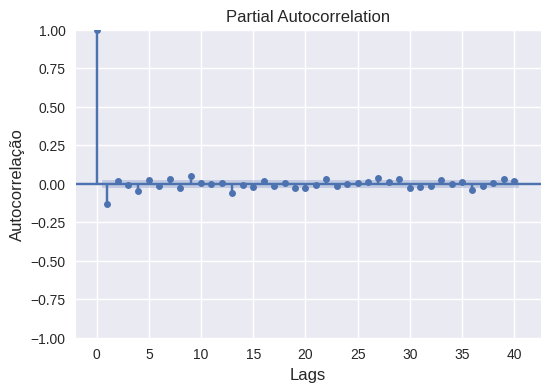

In [26]:
Delta_preco = preco['Preço'].diff()[1:]
Delta_preco.name =  'Delta de ' + preco['Preço'].name
if check_estacionaridade(Delta_preco) :
  from statsmodels.graphics.tsaplots import plot_pacf
  plt.rcParams['figure.figsize'] = [6,4]
  plot_pacf(Delta_preco, lags=40)
  plt.xlabel('Lags', fontsize=12)
  plt.ylabel('Autocorrelação', fontsize=12)
  plt.plot();

In [27]:
#### em 250 dias
X = pd.Series(preco['Preço'][-250:])

In [28]:
ret=preco['Preço'].pct_change().dropna()
ret.name='Retornos'

if check_estacionaridade(ret) :
  print(codigo+' cointegra com ')

  if usar_periodo :
    IBrA_preco = yf.download((pd.Series(IBrA)+'.SA').to_list(), period = periodo , progress = False)[qual_preco]
  else :
    IBrA_preco = yf.download((pd.Series(IBrA)+'.SA').to_list(), start=inicio , end=termino , progress = False)[qual_preco]

  min_score=0.0
  cont=0


  for T in IBrA :
      if T == codigo : # pula e passa pra próxima
        continue
      Y = pd.Series(IBrA_preco[T+'.SA'][-250:].dropna())
      """
      Test for no-cointegration. The null hypothesis is no cointegration.
      Variables in y0 and y1 are assumed to be integrated of order 1, I(1).
      """
      if Y.shape == X.shape :
        t,p,c = coint(X,Y)
        for pvalue in [0.01,0.05] :
          if p < pvalue :
            cont+=1
            print(T+' no nivel de confiança '+str((1-pvalue)*100)+"%", end=" - ")
            if pvalue == 0.01 : vc=c[0]
            elif pvalue == 0.05 : vc=c[1]
            else : vc=c[2]
            print('score='+str(t)+' para o valor crítico '+str(vc))
            if t < min_score :
              min_score=t
              Min_score=T
            break


p-value = 2.377628062345805e-30 A serie "Retornos" é, provavelmente, estacionaria.
EGIE3 cointegra com 
UGPA3 no nivel de confiança 99.0% - score=-3.919801491153983 para o valor crítico -3.940964283479299


In [29]:
Y = IBrA_preco[Min_score+'.SA'][-250:]
slope,intercept, r, pvalue, stderr = stats.linregress(y=Y,x=X)
residuos =  Y - slope * X

In [30]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


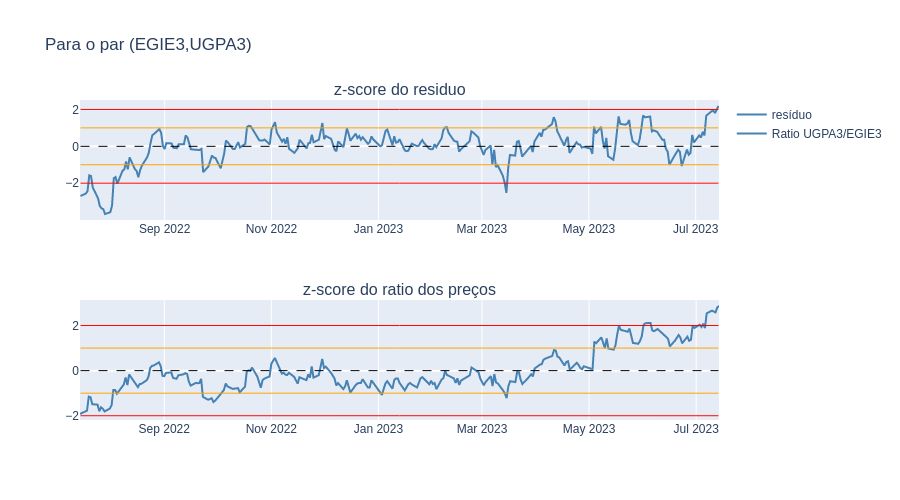

In [31]:

trace1 = go.Scatter( x = residuos.index,  y = zscore(residuos) ,
                    name = 'resíduo',
                    line=dict(color='steelblue'))

trace2 = go.Scatter( x = Y.index,  y = zscore(Y/X) ,
                    name = 'Ratio '+Min_score+'/'+codigo,
                    line=dict(color='steelblue'))

fig = make_subplots(rows=2, cols=1,subplot_titles=(['z-score do residuo','z-score do ratio dos preços']))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(shapes=[{'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'black','width': 1,'dash':'dash'}},
                             {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'black','width': 1,'dash':'dash'}},
                             {'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'red','width': 1}}
                             ],title='Para o par ('+codigo+','+Min_score+')',
                     width=900,
                     height=500)
fig.show()

##Drawdown máximo no período


In [32]:
def get_max_drawdown(price):
  data = pd.DataFrame(price)
  column = price.name
  data['max'] = data[column].cummax()
  data['delta'] = data['max'] - data[column]
  data['dd'] = 100 * (data['delta'] / data['max'])
  maxdrawdown = data['dd'].max()
  bottom_day = data['dd'].idxmax()
  bottom_index = data[['dd']].index.get_loc(bottom_day)
  max_value = data.iloc[bottom_index]['max']
  top_day = (data['max'] == max_value).idxmax()
  top_index = data[['max']].index.get_loc(top_day)
  return maxdrawdown, bottom_day, bottom_index, top_day, top_index

In [33]:
dd, bday, bindex, tday, tindex = get_max_drawdown(preco['Preço'])
print('max drawdown ', round(dd,2),'% de ', tday.strftime('%d/%m/%Y') , ' até ' , bday.strftime('%d/%m/%Y') )

max drawdown  53.46 % de  13/01/2004  até  28/01/2005


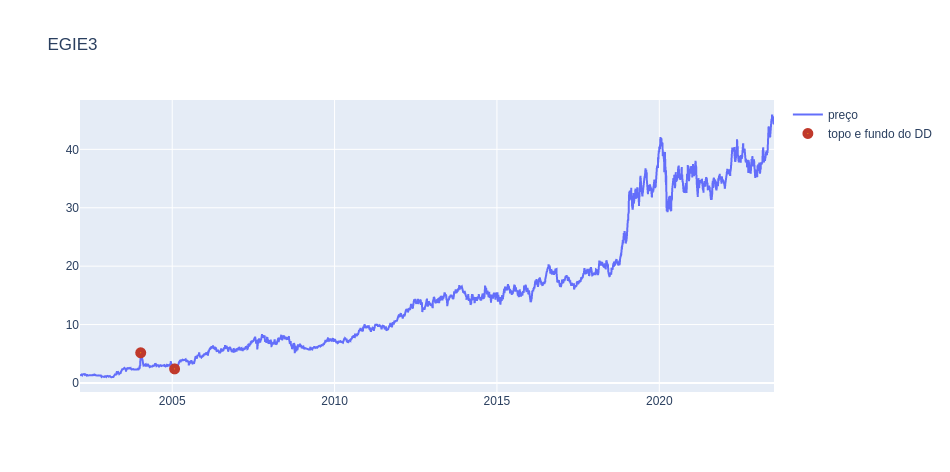

In [34]:
trace1 = go.Scatter(x = preco.index, y = preco['Preço'], mode = 'lines' , name = 'preço' )
trace2 = go.Scatter(x = [preco.index[bindex],preco.index[tindex]],
                    y = [preco['Preço'].iloc[bindex] , preco['Preço'].iloc[tindex]],
                   mode = 'markers', name = 'topo e fundo do DD',
                   marker =  {'color' : 'orange',
                              'line' : {'width': 5,
                                        'color': '#c0392b'}} )
layout =  dict( title = codigo,
    height = 472,
    width = 950,
  #  font = dict(
  #    size = 10
  #  ),
)

data_trace = [trace1,trace2]

fig=go.Figure(data=data_trace , layout=layout)
fig.show()

In [35]:
#@title #### Drawdowns por ano
years = [*range(datetime.strptime(inicio, "%Y-%m-%d").year , datetime.strptime(termino, "%Y-%m-%d").year + 1)]
DDM = pd.DataFrame(columns=[codigo , 'Ibov'],index=years)#, codigo , 'Ibov'])

In [36]:
i=0
yearly_data=pd.DataFrame()
for year in years :
  yearly_data = preco[preco.index.year == year].copy()

  if len(yearly_data.index)>0 :
      yearly_dd1,_,_,_,_ = get_max_drawdown(yearly_data['Preço'])
      yearly_dd2,_,_,_,_ = get_max_drawdown(yearly_data['ibov'])
      DDM.loc[year] = [round(yearly_dd1,2), round(yearly_dd2,2)]
  i=i+1

Drawdowns máximos por ano:


,EGIE3,Ibov
2020,30.57,46.82
2021,17.6,22.94
2022,15.82,20.93
2023,6.39,14.25


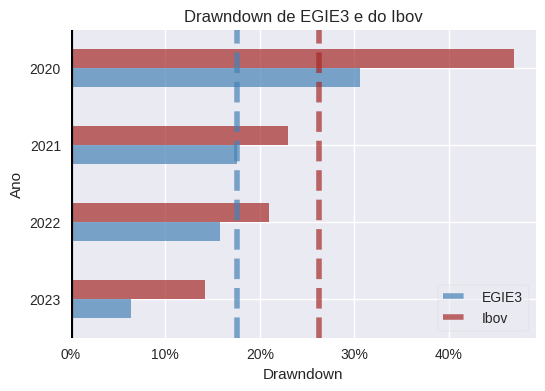

In [37]:
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    return '%.0f%%' % x

ax = plt.gca()

x_axis_formatter = FuncFormatter(percentage)
ax.xaxis.set_major_formatter(FuncFormatter(x_axis_formatter))
ax.tick_params(axis='x', which='major')

ax.axvline(DDM[codigo].values.mean(),color='steelblue',linestyle='--',lw=4,alpha=0.7);
ax.axvline(DDM['Ibov'].values.mean(), color='brown',  linestyle='--',lw=4,alpha=0.7);
(DDM.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= ['steelblue','brown']);
ax.axvline(0.0, color='black', linestyle='-', lw=3);

ax.set_ylabel('Ano');
ax.set_xlabel('Drawndown');
ax.set_title("Drawndown de "+codigo+" e do Ibov");
ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

print('Drawdowns máximos por ano:')

DDM

# Retornos


In [38]:
preco['retorno'] = preco['Preço'].pct_change()
preco['log_retorno'] = np.log(preco['Preço']) - np.log(preco['Preço'].shift(1))
ibov['Preço'] = ibov[qual_preco]
ibov['retorno'] = ibov['Preço'].pct_change()
ibov['log_retorno'] = np.log(ibov['Preço']) - np.log(ibov['Preço'].shift(1))

In [39]:
retornos = pd.merge(ibov['retorno'], preco['retorno'],
                    left_index=True, right_index=True, how='inner')
retornos = retornos.rename(columns={ibov['retorno'].name+'_x':'r_ibov' , preco['retorno'].name+'_y':'r_'+codigo})
retornos['lr_ibov'] = ibov['log_retorno']
retornos['lr_'+codigo] = preco['log_retorno']
retornos.dropna(inplace=True)

print(retornos.shape)
retornos.head(2)

(5293, 4)


,r_ibov,r_EGIE3,lr_ibov,lr_EGIE3
Date,,,,
2002-03-04,0.008924,0.00,0.008885,0.000000
2002-03-05,-0.031788,-0.04,-0.032304,-0.040822


In [40]:
##semanal
weekly_returns = pd.DataFrame()
weekly_returns[codigo] = preco['Preço'].resample('W').ffill()
weekly_returns['retorno'] =  weekly_returns[codigo].pct_change()
weekly_returns.dropna(inplace=True)

##mensal
monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill()
monthly_returns['retorno'] = monthly_returns[codigo].pct_change()
monthly_returns.dropna(inplace=True)

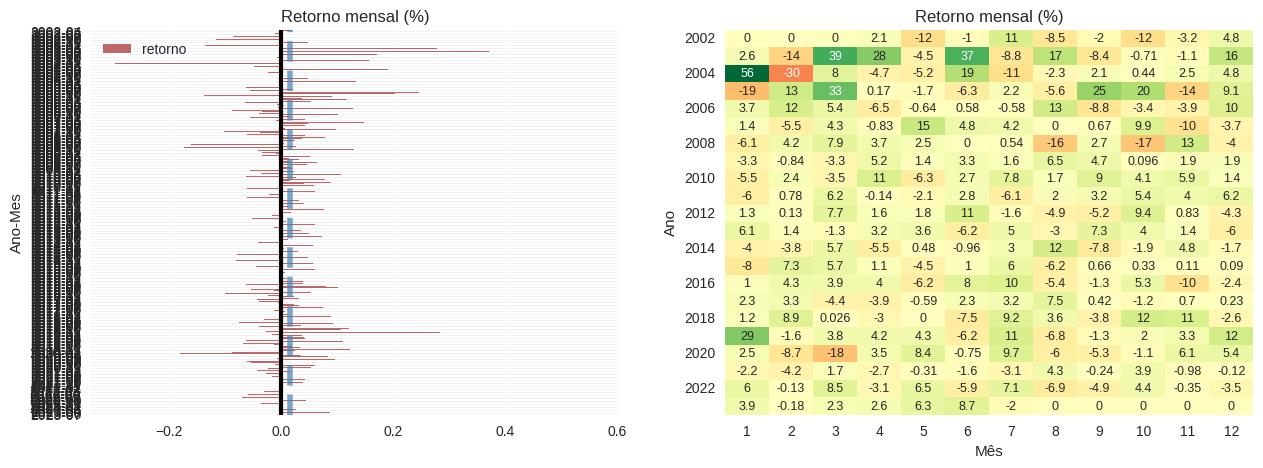

In [41]:
fig = plt.figure(1)
plt.subplot(1,2,1)
ax = plt.gca()

mr = pd.DataFrame(data=monthly_returns['retorno'])
mr.index = mr.index.to_period(freq='M')

ax.axvline(mr.values.mean(), color='steelblue',  linestyle='--',lw=4,alpha=0.7);
(mr.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= 'brown');
ax.axvline(0.0, color='black', linestyle='-', lw=3);
ax.set_ylabel('Ano-Mes')
ax.set_title("Retorno mensal (%)")

#ax.set_ylabel('Ano');
#ax.set_xlabel('Drawndown');
#ax.set_title("Drawndown de "+codigo+" e do Ibov");
#ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

plt.subplot(1,2,2)
ax = plt.gca()

returns_table = monthly_returns.pivot_table(values='retorno',
                               index=monthly_returns.index.year,
                               columns=monthly_returns.index.month,
                               aggfunc='mean')

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax)
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(15,5)
plt.show()

In [42]:
returns_table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2002,NaN,NaN,NaN,0.020501,-0.116071,-0.010101,0.109694,-0.085058,-0.020101,-0.115384,-0.031884,0.047904
2003,0.025714,-0.136490,0.387097,0.279069,-0.045455,0.371429,-0.087500,0.171994,-0.084416,-0.007092,-0.011429,0.157515
2004,0.561798,-0.296563,0.079546,-0.047369,-0.051933,0.191142,-0.109589,-0.023077,0.021372,0.004405,0.025219,0.048129
2005,-0.188775,0.134591,0.328160,0.001669,-0.017500,-0.062765,0.021720,-0.055802,0.247655,0.203007,-0.137500,0.090580
2006,0.037209,0.117873,0.054441,-0.064674,-0.006391,0.005848,-0.005814,0.128654,-0.088082,-0.034091,-0.039412,0.102266
2007,0.013889,-0.054795,0.043478,-0.008333,0.148459,0.048293,0.042345,0.000000,0.006697,0.099334,-0.102461,-0.036861
2008,-0.061033,0.042500,0.078657,0.036905,0.024872,0.000000,0.005439,-0.161465,0.027295,-0.173913,0.130409,-0.040352
2009,-0.032884,-0.008362,-0.033164,0.051744,0.014372,0.032698,0.015831,0.064747,0.046617,0.000958,0.018672,0.019048
2010,-0.054673,0.023727,-0.034766,0.108054,-0.062714,0.026647,0.078339,0.016630,0.089970,0.040926,0.059138,0.013663


### normalidade na distribuição dos retornos

In [43]:
r_media = retornos['r_'+codigo].mean()
r_variancia = retornos['r_'+codigo].var()
r_desviopadrao = retornos['r_'+codigo].std()

jb_test = stats.jarque_bera(retornos['r_'+codigo].values)
print(f'teste Jarque-Bera: {jb_test[0]:.2f} com p-valor: {jb_test[1]:.2f}')
r_range = np.linspace(min(retornos['r_'+codigo]), max(retornos['r_'+codigo]), num=1000)
norm_pdf = stats.norm.pdf(r_range, loc=r_media , scale=r_desviopadrao)

teste Jarque-Bera: 102047.78 com p-valor: 0.00


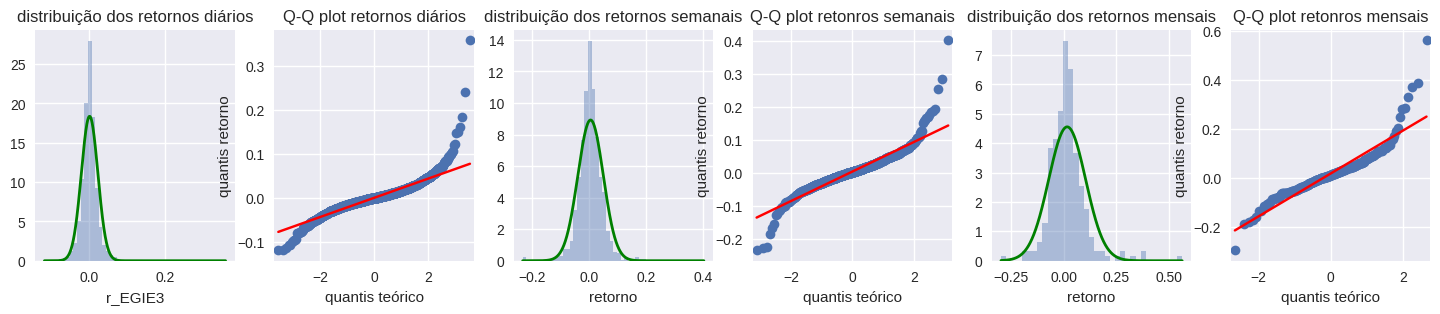

In [44]:
r_fig, ax = plt.subplots(1, 6 , figsize=(18,3))

r_range = np.linspace(min( retornos['r_'+codigo]), max( retornos['r_'+codigo]), num=1000)
# histograma diário
sns.distplot( retornos['r_'+codigo], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('distribuição dos retornos diários')#, fontsize=12)
ax[0].plot(r_range, stats.norm.pdf(r_range, loc=r_media, scale=r_desviopadrao) ,#
           'g', lw=2,label=f'N({r_media:.2f}, {r_variancia:.4f})')
# Q-Q plot diário
qq1 = sm.qqplot( retornos['r_'+codigo].values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot retornos diários')#, fontsize = 12)
ax[1].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

##semanal
r_range = np.linspace(min(weekly_returns['retorno']), max(weekly_returns['retorno']), num=1000)
w_m = weekly_returns['retorno'].mean()
w_s = weekly_returns['retorno'].std()

# histograma semanal
sns.distplot(weekly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[2])
ax[2].set_title('distribuição dos retornos semanais')#, fontsize=12)
ax[2].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot semanal
qq2 = sm.qqplot(weekly_returns['retorno'].values, line='s', ax=ax[3])
ax[3].set_title('Q-Q plot retonros semanais')#, fontsize = 12)
ax[3].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')


##mensal
r_range = np.linspace(min(monthly_returns['retorno']), max(monthly_returns['retorno']), num=1000)
w_m = monthly_returns['retorno'].mean()
w_s = monthly_returns['retorno'].std()

# histograma mensal
sns.distplot(monthly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[4])
ax[4].set_title('distribuição dos retornos mensais')#, fontsize=12)
ax[4].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot mensal
qq2 = sm.qqplot(monthly_returns['retorno'].values, line='s', ax=ax[5])
ax[5].set_title('Q-Q plot retonros mensais')#, fontsize = 12)
ax[5].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

fig.tight_layout()
fig.show()

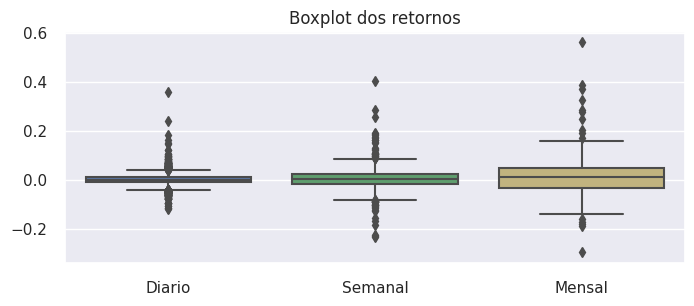

In [45]:
sns.set(rc={'figure.figsize':(8,3)})
sns.axes_style(style='darkgrid' )
ax = plt.gca()
ax.set_title('Boxplot dos retornos')
sns.boxplot(data=[retornos['r_'+codigo], weekly_returns['retorno'], monthly_returns['retorno']],
                palette=["#4c72B0", "#55A868", "#CCB974"], ax=ax)
ax.set_xticklabels(['Diario', 'Semanal', 'Mensal']);

comparação com ibov

In [46]:
print('-- Estatísticas do retorno diário')
tmp = [['Intervalo de datas' , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date)) , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date))],
       ['no. de observações' , retornos['r_'+codigo].shape[0] , retornos['r_ibov'].shape[0]],
       ['min', str(round( retornos['r_'+codigo].min()*100,3))+'%', str(round( retornos['r_ibov'].min()*100,3))+'%'],
       ['max', str(round( retornos['r_'+codigo].max()*100,3))+'%', str(round( retornos['r_ibov'].max()*100,3))+'%'],
       ['média', str(round( retornos['r_'+codigo].mean()*100,3))+'%', str(round( retornos['r_ibov'].mean()*100,3))+'%'],
       ['mediana', str(round( retornos['r_'+codigo].median()*100,3))+'%', str(round( retornos['r_ibov'].median()*100,3))+'%'],
       ['desvio padrão', str(round( retornos['r_'+codigo].std()*100,3))+'%', str(round( retornos['r_ibov'].std()*100,3))+'%'],
       ['assimetria', round( retornos['r_'+codigo].skew(),3), round( retornos['r_ibov'].skew(),3)],
       ['curtose', round( retornos['r_'+codigo].kurtosis(),3), round( retornos['r_ibov'].kurtosis(),3)],
       ['retorno anualizado',str(round( retornos['r_'+codigo].mean()*252*100,2))+'%' , str(round( retornos['r_ibov'].mean()*252*100,2))+'%'],
       ['dp anualizado',str(round( retornos['r_'+codigo].std()*np.sqrt(252)*100,2))+'%' , str(round( retornos['r_ibov'].std()*np.sqrt(252)*100,2))+'%'],
      ]
vol = pd.DataFrame(tmp , columns=['tmp' , 'r_'+codigo , 'r_ibov'], index=[i[0] for i in tmp])
vol.drop('tmp',axis=1, inplace=True)
data_table.DataTable(vol , include_index=True ,num_rows_per_page=15)

-- Estatísticas do retorno diário


,r_EGIE3,r_ibov
Intervalo de datas,2002-03-04 ~ 2023-07-14,2002-03-04 ~ 2023-07-14
no. de observações,5293,5293
min,-11.785%,-14.78%
max,35.81%,14.656%
média,0.09%,0.055%
mediana,0.0%,0.079%
desvio padrão,2.171%,1.731%
assimetria,1.461,-0.144
curtose,21.333,7.24
retorno anualizado,22.64%,13.81%


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


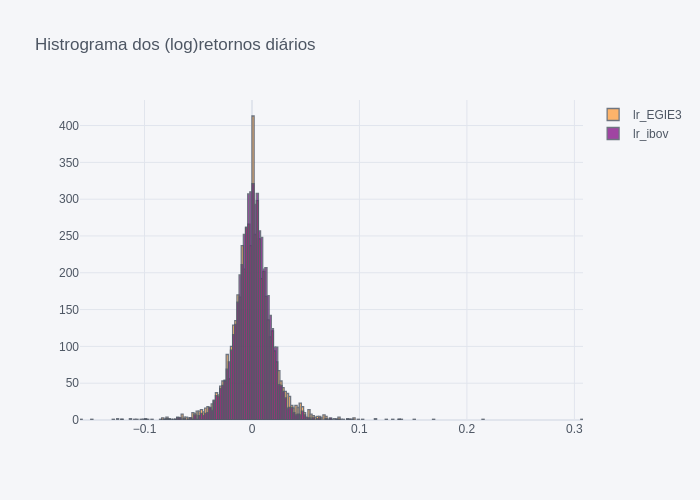

In [47]:
#@markdown histogramas dos (log)retornos diários

retornos.iplot(kind='histogram',
                  #subplots=True,
                  keys = ['lr_'+codigo,'lr_ibov'],
                  colors=['orange','purple'],
                  title='Histrograma dos (log)retornos diários',
                  #theme="henanigans"
                  )

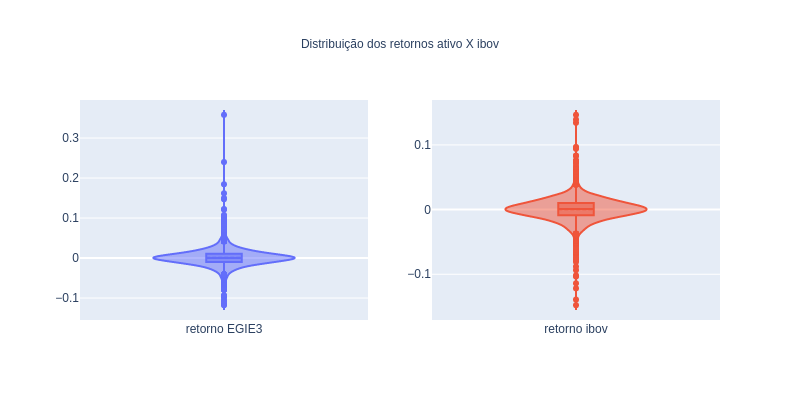

In [48]:
title = "Distribuição dos retornos ativo X ibov"

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_'+codigo].values, name='retorno '+codigo)
    ,row=1, col=1)
fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_ibov'], name='retorno ibov')
    ,row=1, col=2)
fig.update_layout(title_font_size=12 , width=800 , height=400 , showlegend=False,
               title={'text': title,'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},   )

fig.show()

In [49]:
stats.t.interval(alpha=0.98, df=len(retornos)-1,
              loc= retornos['r_ibov'].mean(),
              scale=stats.sem(retornos['r_ibov']))

(-5.708975754000812e-06, 0.00110156146685039)

In [50]:
ipca = quandl.get('BCB/13522', start_date = min(retornos.index.date))
ipca.rename(columns={'Value': 'ipca'}, inplace=True)
cdi=quandl.get('BCB/12', start_date = min(retornos.index.date))
cdi.rename(columns={'Value': 'cdi'}, inplace=True)

In [51]:
#cdi.index=cdi.index.tz_localize(tz='America/Sao_Paulo')
#ipca.index=ipca.index.tz_localize(tz='America/Sao_Paulo')

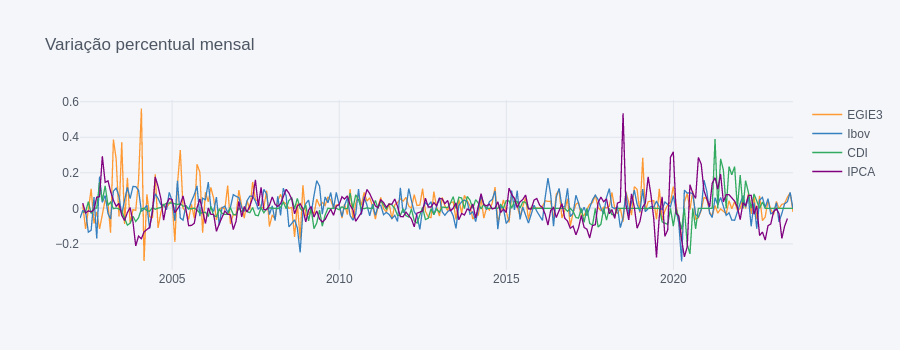

In [52]:
# @ markdown gráficos dos retornos mensais

monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill().pct_change()
monthly_returns['Ibov'] = ibov['Preço'].resample('M').ffill().pct_change()
monthly_returns['CDI']  = cdi['cdi'].resample('M').ffill().pct_change()
monthly_returns['IPCA'] = ipca['ipca'].pct_change()

trace2 = (monthly_returns).iplot(title= 'Variação percentual mensal',dimensions=(900,350))

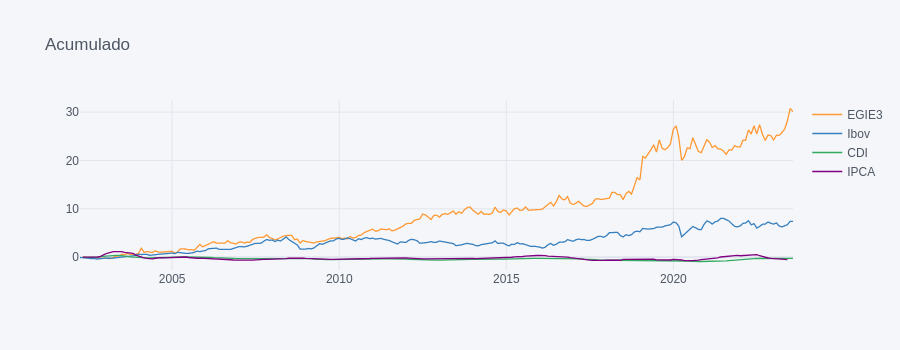

In [53]:
cum_returns = (monthly_returns + 1).cumprod() - 1
trace3 = cum_returns.iplot(title= 'Acumulado',dimensions=(900,350))

###Underwater

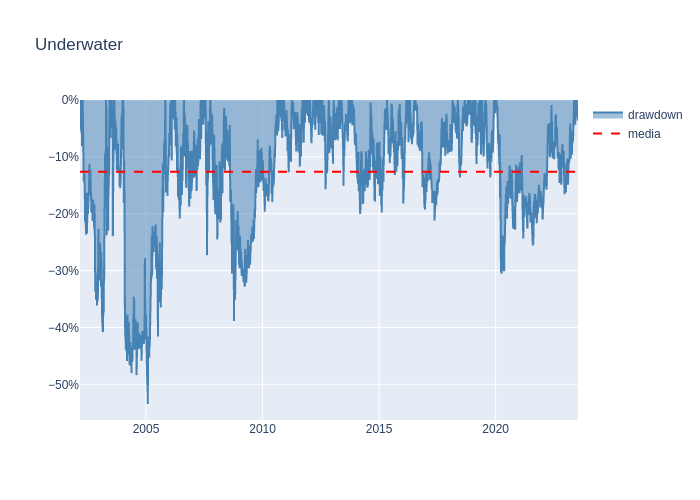

In [54]:
df_cum_rets = (retornos['r_'+codigo]+1).cumprod()
running_max = np.maximum.accumulate(df_cum_rets)
underwater = (df_cum_rets-running_max) / running_max
trace1 = go.Scatter(x=underwater.index,y=underwater, name = 'drawdown',line=dict(color='steelblue'), fill='tozeroy')

df_cum_rets_mean = -underwater.mean()
trace2 = go.Scatter(x=[min(underwater.index),max(underwater.index)],y=[-df_cum_rets_mean,-df_cum_rets_mean],
                    mode='lines',name = 'media',line=dict(color='red', width=2, dash='dash'))

layout = go.Layout(title='Underwater',showlegend=True)
fig = go.Figure(data=[trace1,trace2], layout=layout)
fig.layout.yaxis.tickformat = '.0%'

fig.show()

### correlação dos retornos com ativos do índice amplo

In [55]:
IBrA_rtrns = pd.DataFrame()
if codigo in IBrA : IBrA_rtrns = IBrA_preco.pct_change()
else :
  IBrA_rtrns = (IBrA_preco.pct_change()).join(retornos['r_'+codigo],how='inner')
  IBrA_rtrns.rename(columns={'r_'+codigo : codigo+'.SA'}, inplace=True)
IBrA_rtrns.dropna(inplace=True)
#m=IBrA_rtrns.corr()

In [56]:
data_corr = pd.DataFrame(IBrA_rtrns.corr().loc[codigo+'.SA'])

(no colab) clique na figura


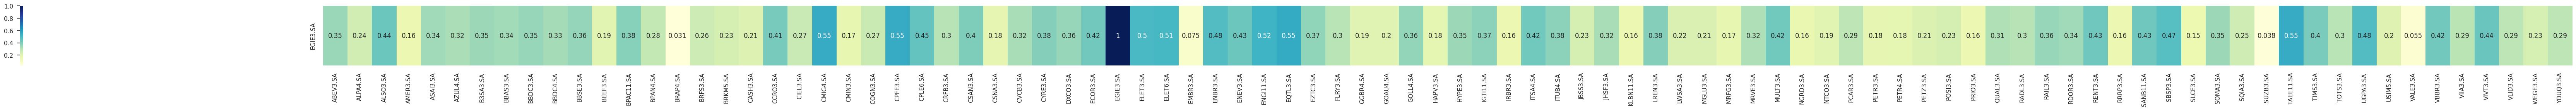

In [57]:
sns.set(rc = {'figure.figsize':(100,2)})
sns.heatmap(data_corr.T, annot = True, cmap = 'YlGnBu' , cbar_kws = dict(use_gridspec = False, location = "left"))
print('(no colab) clique na figura')

In [58]:
if usar_periodo :
  I50 = yf.download((pd.Series(IBr50)+'.SA').to_list(), period = periodo , actions=True , progress = False)
else :
  I50 = yf.download((pd.Series(IBr50)+'.SA').to_list(), start=inicio , end=termino , actions=True ,  progress = False)


In [59]:
I50_rtrns = (I50['Adj Close']).pct_change().dropna()

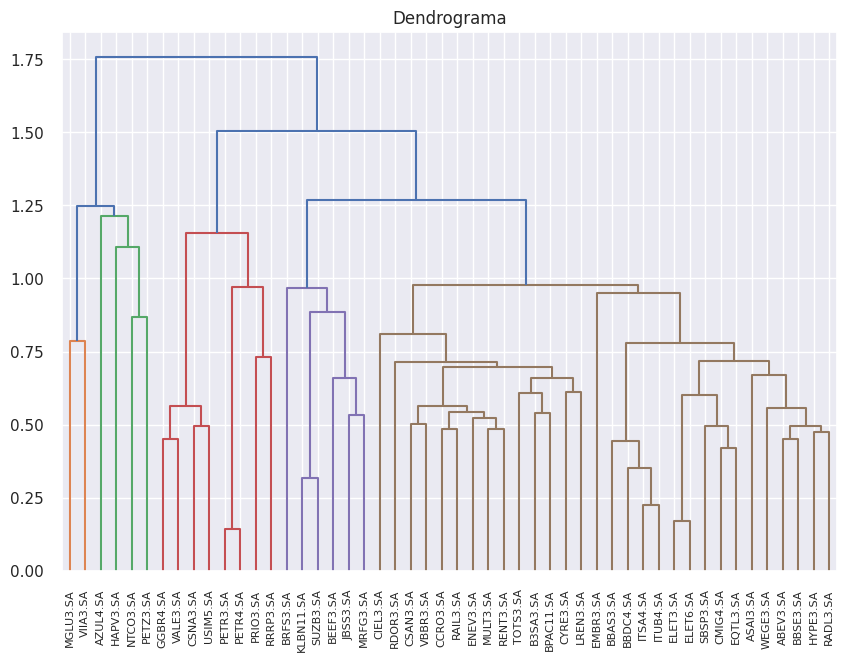

In [60]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrograma")

clusters = shc.linkage(I50_rtrns.T, method='ward', metric='euclidean')

dendograma = shc.dendrogram(clusters, labels=I50_rtrns.columns)


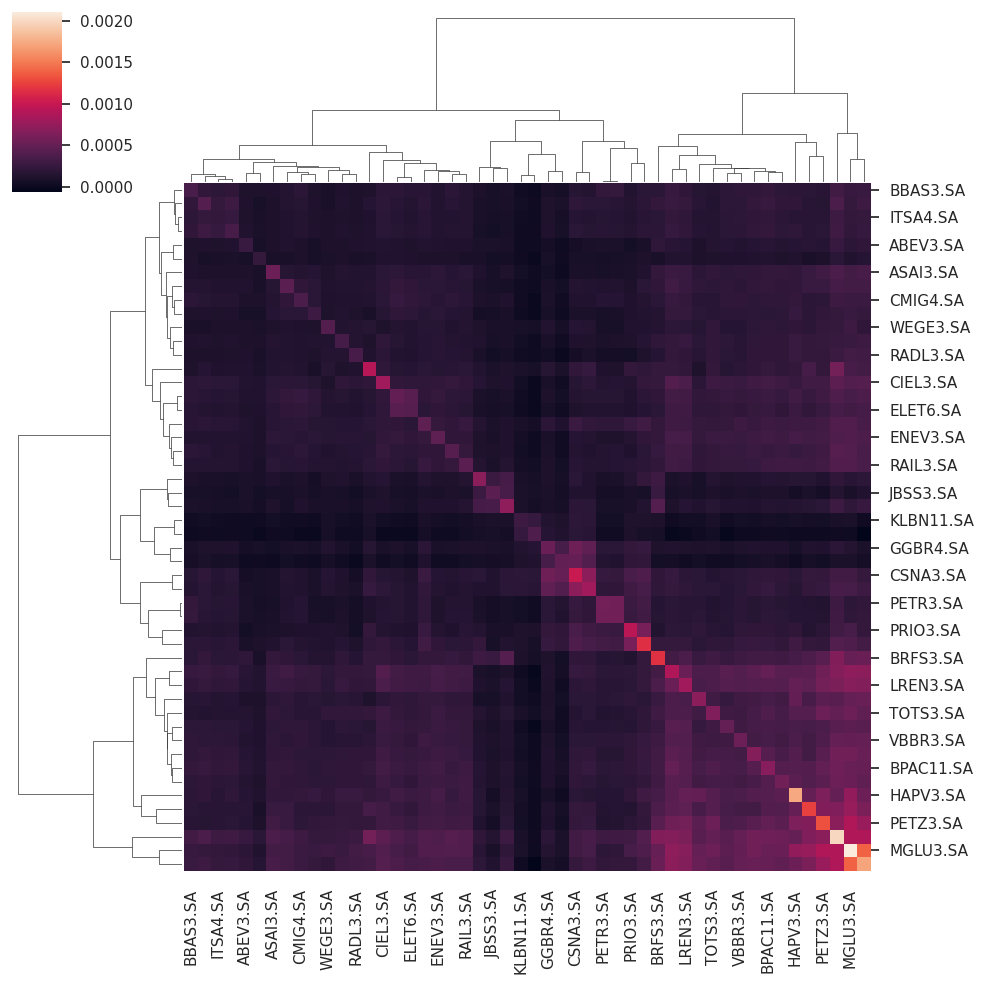

In [61]:
matriz_covarianca = I50_rtrns.cov()
dendograma = sns.clustermap(matriz_covarianca, method='ward', metric='euclidean')
colunas_seriation = dendograma.dendrogram_col.reordered_ind
colunas_seriation = I50_rtrns.columns[colunas_seriation]


### retorno esperado pelo CAPM



In [62]:
## o join garante a coincidencia da datas
capm_data = ((cdi.join(retornos['r_'+codigo])).join(retornos['r_ibov'])).dropna()
capm_data.head(2)

,cdi,r_EGIE3,r_ibov
Date,,,
2002-03-04,0.068352,0.00,0.008924
2002-03-05,0.068352,-0.04,-0.031788


import numpy as np
from google.colab import autoviz
df_7369524500963460520 = autoviz.get_registered_df('df_7369524500963460520')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7369524500963460520, *['r_EGIE3'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7369524500963460520 = autoviz.get_registered_df('df_7369524500963460520')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7369524500963460520, *['r_ibov'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7369524500963460520 = autoviz.get_registered_df('df_7369524500963460520')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7369524500963460520, *['r_EGIE3'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7369524500963460520 = autoviz.get_registered_df('df_7369524500963460520')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7369524500963460520, *['r_ibov'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7369524500963460520 = autoviz.get_registered_df('df_7369524500963460520')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7369524500963460520, *[[['r_EGIE3', 'r_ibov']]], **{})
chart

In [63]:
X = capm_data['r_ibov'] - capm_data['cdi']     # excesso retorno ativo
y = capm_data['r_'+codigo] - capm_data['cdi']  # excesso retorno indice
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
_, beta = result.params

expected_return = capm_data['cdi'].mean() + beta*X.mean()
print("Retorno diário esperado: " + str(expected_return))
monthly_return = expected_return * 21
print("Retorno mensal esperado: " + str(monthly_return))
yearly_return = monthly_return * 12
print("Retorno anual esperado : " + str(yearly_return))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     4360.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:44:21   Log-Likelihood:                 13055.
No. Observations:                5292   AIC:                        -2.611e+04
Df Residuals:                    5290   BIC:                        -2.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0101      0.001    -17.804      0.0

### hedge

A correlação entre os retornos é 0.42


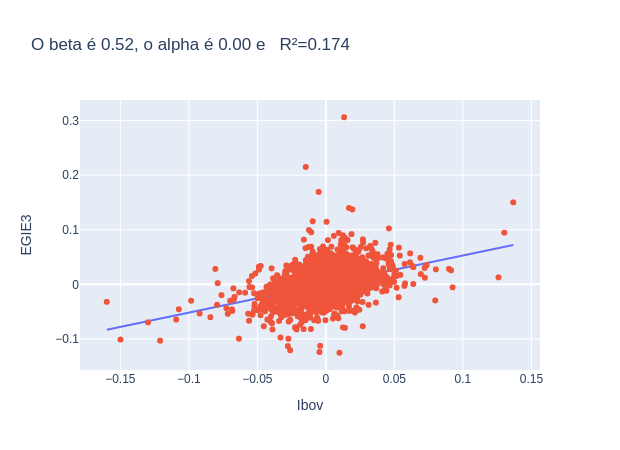

In [64]:
slope,intercept, r, pvalue, stderr = stats.linregress(x=retornos['r_ibov'], y=retornos['r_'+codigo])

print(f'A correlação entre os retornos é {r:.2f}')

line_x = np.linspace(retornos['lr_ibov'].min(), retornos['lr_ibov'].max(),100)
line_y = slope*line_x + intercept
trace1 = go.Scatter(x = line_x,y = line_y, mode = 'lines' )

trace2 = go.Scatter(x = retornos['lr_ibov'], y=retornos['lr_'+codigo] , mode ='markers')

layout = dict(title = f'O beta é {slope:.2f}, o alpha é {intercept:.2f} e   R²={r**2:.3f}',
              xaxis_title="Ibov",
              yaxis_title=codigo,
              height = 450,width = 620,
              showlegend=False,
              font = dict(size = 12),    )

data_trace = [trace1,trace2]
ply.iplot(go.Figure(data=data_trace , layout=layout))

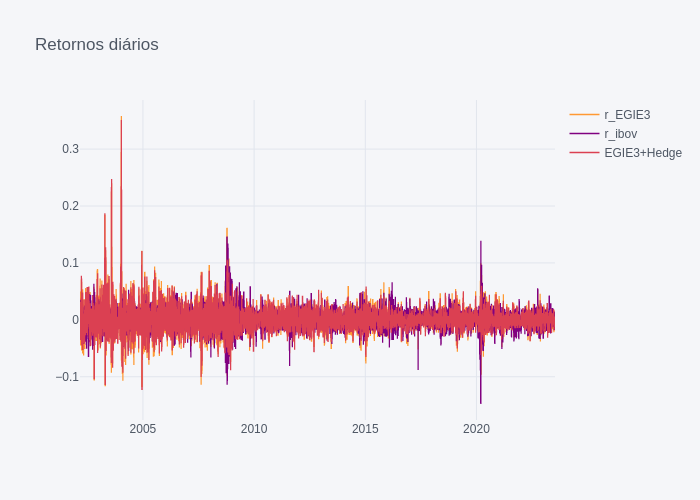

In [65]:
# beta hedge
"""
Os gerentes de carteiras projetam modelos de fatores que lhes dizem como equilibrar um portfólio para obter alfa.
Como alfa é como os gerentes são pagos, eles só querem exposição a seus fatores.
A cobertura beta remove a parte dos retornos impulsionados pelo mercado e deixa apenas os retornos impulsionados pelos fatores.
"""


retornos[codigo+"+Hedge"] = -1 * slope * retornos['r_ibov']+ retornos['r_'+codigo]
retornos.iplot(   keys = ['r_'+codigo,'r_ibov',codigo+"+Hedge"],
                  colors=['orange','purple', 'red'],
                  title='Retornos diários' )


In [66]:
P = retornos[codigo+"+Hedge"].values
X = retornos['r_ibov'].values
alpha,beta,_,_,_ = stats.linregress(X, P)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: 1.5516296484801256e-16
Beta: 0.0006117052819122836


#Volatilidade

##Volatilidade Condicional

Garch(1,1): a variância condicional é $\sigma_n^2 = \omega + \alpha r_{n-1}^2 + \beta\sigma_{n-1}^2 $, as letras gregas são parâmetros estimados (por máx. verossimilhamça) do modelo, $r$ é retorno e $\sigma^2$ variância.  Os parâmetros:  $\omega = (1-\alpha-\beta)\cdot(\text{var de longo prazo})$, que é uma "reversão a média": $\sigma_{\infty}^2\to \text{VLP}$ com velocidade $1-\alpha-\beta$; $\alpha$ é o peso dos retornos  mais recentes, desde que $\alpha,\beta,\omega\geq 0$ e $\alpha+\beta<1$; $\beta$ é velocidade do  decaimento para as volatilidades mais recentes.

Quando $\omega=0,\alpha=1-\lambda, \beta=\lambda$ é o ewma: $ (1-\lambda) r_{n-1}^2 + \lambda \sigma_{n-1}^2$


In [67]:
#@title ####   EWMA
#@markdown fator de decaimento para ewma:
Lambda=0.94 #@param {type:"number"}


In [68]:
ewma = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
ewma['vol'].iloc[0] = np.sqrt((retornos['r_'+codigo][0:4]**2).sum())
for t in range(1,len(retornos['r_'+codigo])):
    ewma.iloc[t] = np.sqrt((1-Lambda)*retornos['r_'+codigo].iloc[t-1]**2 + Lambda*ewma.iloc[t-1]**2)
ewma.tail(3)

,vol
Date,
2023-07-12,0.009136
2023-07-13,0.008941
2023-07-14,0.009219


import numpy as np
from google.colab import autoviz
df_7643980763058642242 = autoviz.get_registered_df('df_7643980763058642242')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7643980763058642242, *['vol'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7643980763058642242 = autoviz.get_registered_df('df_7643980763058642242')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7643980763058642242, *['vol'], **{})
chart

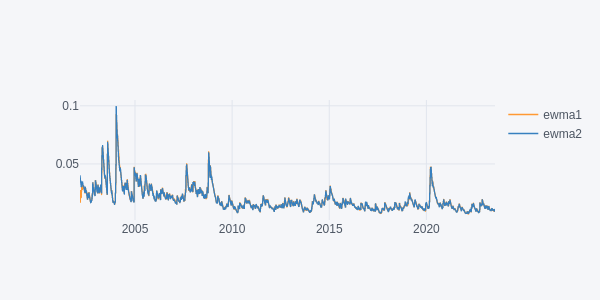

In [69]:
#########
tmp=pd.DataFrame()
tmp['ewma1'] = (retornos['r_'+codigo].ewm(alpha = 0.06, min_periods=4, adjust=False).std()).shift(1)
tmp['ewma2'] = ewma['vol']
tmp.iplot(dimensions=(600,300))
##########

In [70]:
#@title ####   GARCH(1,1)

!pip install -q arch
import scipy.optimize as spop

def garch_mle(params):
    mu    = params[0]
    omega = params[1]
    alpha = params[2]
    beta  = params[3]
    #variancia de longo prazo
    long_var =  (omega/(1 - alpha - beta))
    #volatilidade de longo prazo
    long_run = np.sqrt(long_var*252)
    #volatilidade condicional
    resid = retornos['r_'+codigo] - mu
    realised = abs(resid)
    conditional = np.zeros(len(retornos['r_'+codigo]))
    conditional[0] =  long_run
    # GARCH
    for t in range(1,len(retornos['r_'+codigo])):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    # np.log-verossimilhança
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    np.log_likelihood = np.sum(np.log(likelihood))
    return -np.log_likelihood
### grach parametros
# maximização  np.log-verossimilhança
res = spop.minimize(garch_mle , [r_media, r_variancia, 0, 0  ], method='Nelder-Mead')

params = res.x
G_mu     = res.x[0]
G_omega  = res.x[1]
G_alpha  = res.x[2]
G_beta   = res.x[3]
np.log_likelihood = -float(res.fun)
#print('np.log-verossim. '+str(round(np.log_likelihood, 4)))
###############################

print('Parâmetros do GARCH encontrados:')
print('mu '+str(round(G_mu, 6)))
print('omega '+str(round(G_omega, 6)))
print('alpha '+str(round(G_alpha, 6)))
print('beta  '+str(round(G_beta, 6)))


Parâmetros do GARCH encontrados:
mu 0.000855
omega 9e-06
alpha 0.112652
beta  0.864364


In [71]:
long_run = (G_omega/(1 - G_alpha - G_beta))**(1/2)
G_resid = retornos['r_'+codigo] - G_mu

conditional = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
conditional['vol'].iloc[0] = long_run
for t in range(1,len(retornos['r_'+codigo])):
    conditional['vol'].iloc[t] = (G_omega + G_alpha*G_resid.iloc[t-1]**2 + G_beta*conditional.iloc[t-1]**2)**(1/2)
conditional.tail(3)

,vol
Date,
2023-07-12,0.011034
2023-07-13,0.010787
2023-07-14,0.011220


import numpy as np
from google.colab import autoviz
df_1334072812241995643 = autoviz.get_registered_df('df_1334072812241995643')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1334072812241995643, *['vol'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1334072812241995643 = autoviz.get_registered_df('df_1334072812241995643')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1334072812241995643, *['vol'], **{})
chart

In [72]:
print('VOLATILIDADE:')
print('volatilidade diária de longo prazo '+str(round(long_run, 6)*100)+'%')
print('volatilidade de longo prazo anualizada '+str(round(long_run*np.sqrt(252), 6)*100)+'%')
print(' ')

VOLATILIDADE:
volatilidade diária de longo prazo 2.0025999999999997%
volatilidade de longo prazo anualizada 31.7899%
 


In [73]:
from arch import arch_model
model = arch_model(retornos['r_'+codigo], mean='constant',vol='GARCH', p=1, q=1,dist='normal')
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                r_EGIE3   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                13706.0
Distribution:                  Normal   AIC:                          -27404.0
Method:            Maximum Likelihood   BIC:                          -27377.7
                                        No. Observations:                 5293
Date:                Sat, Jul 15 2023   Df Residuals:                     5292
Time:                        19:44:48   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.5026e-04  2.082e-04      4.084  4.419e-05 [4.

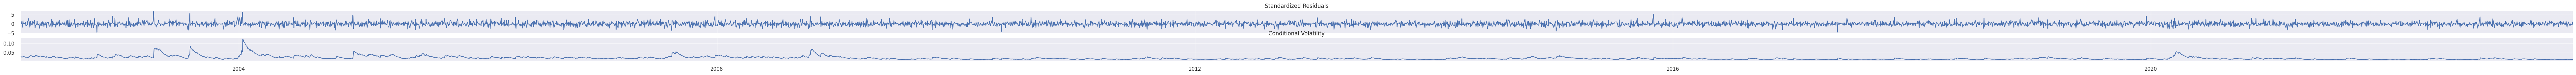

In [74]:
#%matplotlib inline
fig=model_fitted.plot();

In [75]:
model_forecast = model_fitted.forecast(horizon=5)

In [76]:
model_forecast.variance[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-07-14,0.000137,0.000144,0.00015,0.000157,0.000163


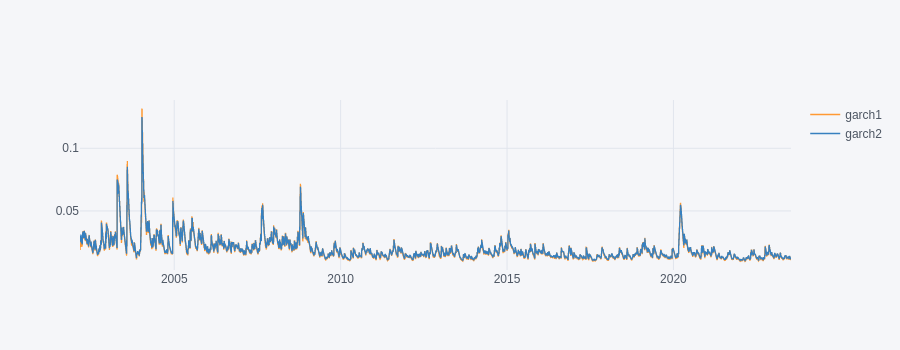

In [77]:
#########
tmp=pd.DataFrame()
tmp['garch1'] = conditional['vol']                      # manual
tmp['garch2'] = model_fitted.conditional_volatility     # pacote
tmp.iplot(dimensions=(900,350))
##########

In [78]:
vols = pd.DataFrame(columns=['ewma' , 'dp' , 'garch(1,1)' , 'longo prazo' , 'g-model'] , index = retornos.index)
vols['ewma'] = ewma['vol']
vols['dp'] = r_desviopadrao
vols['garch(1,1)'] = conditional['vol']
vols['longo prazo'] = long_run
vols['g-model']=model_fitted.conditional_volatility

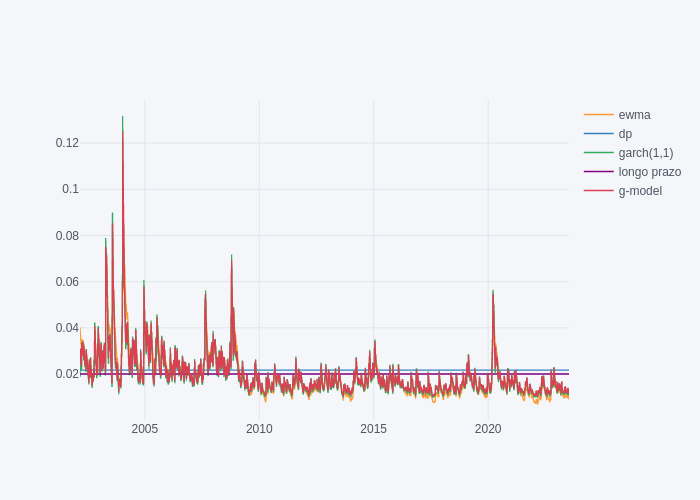

In [79]:
vols.iplot()

In [80]:
vols.round(decimals=3).iloc[::-1].head(3)

,ewma,dp,"garch(1,1)",longo prazo,g-model
Date,,,,,
2023-07-14,0.009,0.022,0.011,0.02,0.012
2023-07-13,0.009,0.022,0.011,0.02,0.011
2023-07-12,0.009,0.022,0.011,0.02,0.012


import numpy as np
from google.colab import autoviz
df_7582568344949258807 = autoviz.get_registered_df('df_7582568344949258807')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7582568344949258807, *['g-model'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7582568344949258807 = autoviz.get_registered_df('df_7582568344949258807')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7582568344949258807, *['g-model'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7582568344949258807 = autoviz.get_registered_df('df_7582568344949258807')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7582568344949258807, *['g-model'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7582568344949258807 = autoviz.get_registered_df('df_7582568344949258807')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7582568344949258807, *['g-model'], **{})
chart


Volatilidade prevista

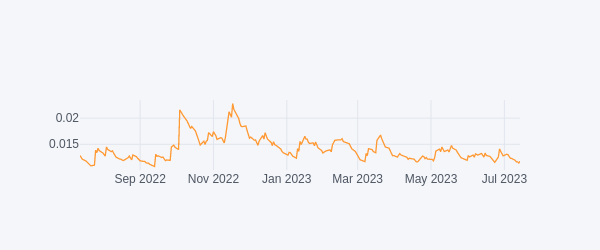

In [81]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = retornos['r_'+codigo][:-(test_size-i)]
    model = arch_model(train, mean='constant',vol='GARCH', p=1, q=1,dist='normal')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=retornos['r_'+codigo].index[-test_size:])
rolling_predictions.iplot(dimensions=(600,250))

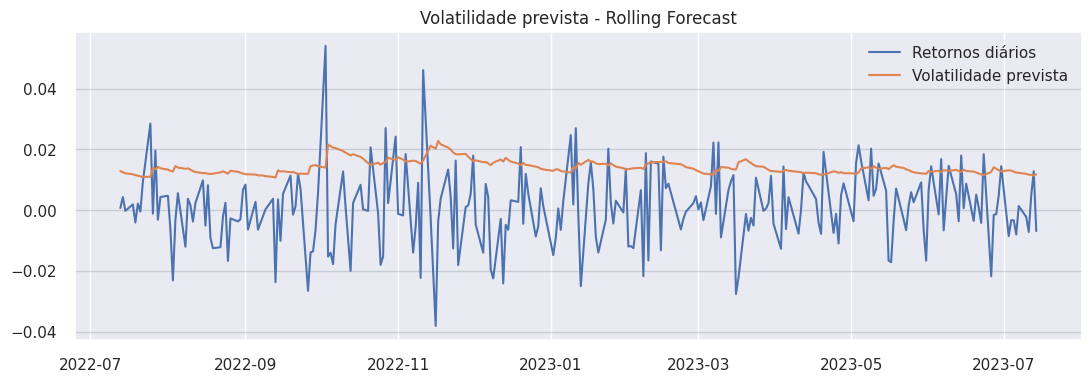

In [82]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
#ax.spines[['top','right']].set_visible(False)
plt.plot(retornos['r_'+codigo][-test_size:])
plt.plot(rolling_predictions)
plt.title('Volatilidade prevista - Rolling Forecast')
plt.legend(['Retornos diários', 'Volatilidade prevista'])


## Preço das opções por BS
Preço da Call $ = SN(d_1) - K e^{-rt}N(d_2)$ e

Preço da Put $ = Ke^{-rt}N(-d_2)-SN(-d_1)$

$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})t}{\sigma \cdot \sqrt{t}}$
e $d_2 = d_1 - \sigma \cdot \sqrt{t}$

S = Preço atual da ação; K = Preço de Strike; r = Taxa livre de risco (com capitalização composta);
σ =Variância (anual) do retorno contínuo da ação; t = Prazo (em anos) até a data de vencimento;
N(d) = Probabilidade de que uma variável aleatória padronizada e com distribuição normal, seja menor ou igual a d


In [83]:
def call_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*stats.norm.cdf(d1)-E*np.exp(-rf*T)*stats.norm.cdf(d2)


def put_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S*stats.norm.cdf(-d1)+E*np.exp(-rf*T)*stats.norm.cdf(-d2)


In [84]:
#data
vencimento = "2023-10-19"    #@param {type:"date"}
venc= datetime.strptime(vencimento, '%Y-%m-%d')

hoje= preco.index[-1]
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
# taxa livre risco
selic = quandl.get('BCB/432', start_date = inicio)
r =  np.log((selic.iloc[-1]/100).values[0]+1)
# preço
S = preco['Preço'].iloc[-1]
# volatilidade
sigma = vols['dp'].iloc[-1]*np.sqrt(252)
sigma = vols['g-model'].iloc[-1]*np.sqrt(252)


preços teóricos para 'vencimento'

In [85]:
# strikes

mm = (preco['Preço'][-21:-1].dropna()).mean()  #preço médio
ss = (preco['Preço'][-21:-1].dropna()).std()   #dp do preço
Ss= mm-3*ss
Sa= mm-2*ss
Sb= mm-1*ss
Sc= mm+1*ss
Sd= mm+2*ss
Se= mm+3*ss



bs_data = [
    [ '{:0.2f}'.format(Ss) , round(call_option_price(S,Ss, t, r, sigma),2)  ,round(put_option_price(S,Ss, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sa) , round(call_option_price(S,Sa, t, r, sigma),2)  ,round(put_option_price(S,Sa, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sb) , round(call_option_price(S,Sb, t, r, sigma),2)  ,round(put_option_price(S,Sb, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(mm) , round(call_option_price(S,mm, t, r, sigma),2)  ,round(put_option_price(S,mm, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(S)  , round(call_option_price(S,S , t, r, sigma),2)  ,round(put_option_price(S ,S, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sc) , round(call_option_price(S,Sc, t, r, sigma),2)  ,round(put_option_price(S,Sc, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sd) , round(call_option_price(S,Sd, t, r, sigma),2)  ,round(put_option_price(S,Sd, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Se) , round(call_option_price(S,Se, t, r, sigma),2)  ,round(put_option_price(S,Se, t, r, sigma),2) ]
]


BS = pd.DataFrame(bs_data , columns=['preço '+codigo, 'preço Call' , 'preço Put'] )
BS.style.hide_index()

preço EGIE3,preço Call,preço Put
43.85,3.180000,0.750000
44.24,2.920000,0.870000
44.63,2.680000,1.000000
45.03,2.440000,1.150000
44.76,2.600000,1.050000
45.42,2.220000,1.310000
45.81,2.020000,1.480000
46.20,1.820000,1.660000


In [86]:
#@markdown preço teórico a partir de outros parâmetros
#@markdown usando BS e Monte Carlo

# preço
S=41.4 #@param {type:"number"}
print('preço  do ativo',S)

# data
vencimento = "2023-10-19"    #@param {type:"date"}
hoje= preco.index[-1]
venc= datetime.strptime(vencimento, '%Y-%m-%d')
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
print("vencimento em "+str(res)+" dias (",t,"anos)")

# strike
strike=40.7  #@param {type:"number"}

# selic
juros = 13.75 #@param {type:"number"}
r=np.log(juros/100+1)
# vol
volatilidade ='EWMA'  #@param ['GARCH' , 'EWMA' ,'Desvio Padrao' ]

if volatilidade == 'GARCH'  :
	sigma = vols['g-model'].iloc[-1]*np.sqrt(252)
elif volatilidade == 'EWMA' :
	sigma = vols['ewma'].iloc[-1]*np.sqrt(252)
else : sigma = vols['ewma'].iloc[-1]*np.sqrt(252)

print("Preços dos derivativos pelo modelo Black-Scholes")
print("Call: ", round(call_option_price(S, strike, t, r, sigma),2))
print("Put: ", round(put_option_price(S, strike, t, r, sigma),2))


preço  do ativo 41.4
vencimento em 69 dias ( 0.27380952380952384 anos)
Preços dos derivativos pelo modelo Black-Scholes
Call:  2.56
Put:  0.45


In [87]:

# Monte Carlo
def call_option_simulation(S0,E,T,rf,sigma,iterations):
	option_data = np.zeros([iterations, 2])
	rand = np.random.normal(0, 1, [1, iterations])
	#equation for the S(t) stock price
	stock_price = S0*np.exp(T*(r - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
	#we need S-E because we have to calculate the max(S-E,0)
	option_data[:,1] = stock_price - E
	#average for the Monte-Carlo method
	#np.amax() returns the max(0,S-E) according to the formula
	average = np.sum(np.amax(option_data, axis=1))/float(iterations)
	#have to use the np.exp(-rT) discount factor
	return np.exp(-1.0*rf*T)*average

def put_option_simulation(S0,E,T,rf,sigma,iterations):
 option_data = np.zeros([iterations, 2])
 rand = np.random.normal(0, 1, [1, iterations])
 stock_price = S0*np.exp(T*(rf - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
 option_data[:,1] = E - stock_price
 average = np.sum(np.amax(option_data, axis=1))/float(iterations)
 return np.exp(-1.0*rf*T)*average


rodadas = 1000	#number of iterations in the Monte-Carlo simulation


print("Preços dos derivativos por simulação Monte Carlo")
print("Call: ", round(call_option_simulation(S,strike,t,r,sigma,rodadas),2))
print("Put: ", round(put_option_simulation(S,strike,t,r,sigma,rodadas),2))

Preços dos derivativos por simulação Monte Carlo
Call:  2.7
Put:  0.43
